In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import zipfile
pd.set_option("display.max_columns", None)



In [4]:
df = pd.read_csv('../input/ids-intrusion-csv/02-14-2018.csv')

In [5]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632086e+07,139.300036,56320958,56320761,112641719,5.632086e+07,139.300036,56320958,56320761,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026633,5.632073e+07,114.551299,56320814,56320652,112641466,5.632073e+07,114.551299,56320814,56320652,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.026634,5.631931e+07,301.934596,56319525,56319098,112638623,5.631931e+07,301.934596,56319525,56319098,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.026634,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0.00,0.000000,0.000000,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,0,227.300000,371.677892,544.161528,3.873587,2.689152e+05,247443.778966,673900,22,6453966,4.609976e+05,123109.423588,673900,229740,5637902,626433.555556,455082.214224,1167293,554,0,0,0,0,488,328,2.324152,1.549435,0,976,135.076923,277.834760,77192.153846,0,0,0,1,0,0,0,0,0,140.48,82.600000,227.300000,0,0,0,0,0,0,15,1239,10,2273,65535,233,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,0,200.818182,362.249864,380.733175,2.839597,3.668361e+05,511356.609733,1928102,21,8804066,6.772358e+05,532416.970959,1928102,246924,7715481,771548.100000,755543.082717,2174893,90,0,0,0,0,456,360,1.590174,1.249423,0,976,128.923077,279.763032,78267.353846,0,0,0,1,0,0,0,0,0,134.08,81.642857,200.818182,0,0,0,0,0,0,14,1143,11,2209,5808,233,6,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [7]:
df["Label"].value_counts()

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

In [8]:
#Summary of label distribution (multiclass)
label_col = "Label" if "Label" in df.columns else ("label" if "label" in df.columns else None)
assert label_col is not None, "Could not find a label column named 'Label' or 'label'"

label_counts = df[label_col].astype(str).value_counts().sort_values(ascending=False)
label_counts


Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

In [9]:
# drop non-feature identifiers, coerce to numeric, handle inf/na


drop_like = [
    "Flow ID", "Src IP", "Dst IP", "Timestamp",
    "SimillarHTTP", "Src Port", "Dst Port",
    "Protocol", "Fwd Header Length.1"
]

drop_cols = [c for c in drop_like if c in df.columns]

X_raw = df.drop(columns=drop_cols, errors="ignore").copy()
y_raw = df[label_col].astype(str).copy()

# Convert all non-label columns to numeric where possible
for c in X_raw.columns:
    if c == label_col:
        continue
    if X_raw[c].dtype == "O":
        X_raw[c] = pd.to_numeric(X_raw[c], errors="coerce")

# Replace inf/-inf and fill NaNs with column medians
X_raw = X_raw.replace([np.inf, -np.inf], np.nan)
X_raw = X_raw.apply(lambda s: s.fillna(s.median()) if s.dtype.kind in "fc" else s)

X_raw.shape, y_raw.shape


((1048575, 77), (1048575,))

In [10]:
# Encode string labels to integer IDs for machine learning
classes = sorted(y_raw.unique().tolist())
label2id = {lbl: i for i, lbl in enumerate(classes)}
id2label = {i: lbl for lbl, i in label2id.items()}

y_multi = y_raw.map(label2id).astype(int)

print("Class mapping:")
for k, v in label2id.items():
    print(f"  {k:20s} -> {v}")

y_multi.value_counts().sort_index().rename(index=id2label)


Class mapping:
  Benign               -> 0
  FTP-BruteForce       -> 1
  SSH-Bruteforce       -> 2


Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

In [11]:
# Remove low-variance and highly correlated features
from sklearn.feature_selection import VarianceThreshold

# Select only numeric features
numeric_cols = [c for c in X_raw.columns if c != label_col and str(X_raw[c].dtype) != "object"]
X_num = X_raw[numeric_cols].copy()

# 1. Remove near-zero variance features
selector = VarianceThreshold(threshold=1e-5)
X_var = selector.fit_transform(X_num)
selected_var_cols = [c for c, keep in zip(numeric_cols, selector.get_support()) if keep]
print(f"Kept {len(selected_var_cols)} of {len(numeric_cols)} numeric columns after variance filtering.")

# 2. Remove highly correlated features (correlation > 0.98)
corr = pd.DataFrame(X_num[selected_var_cols], columns=selected_var_cols).corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_cols = [column for column in upper.columns if any(upper[column] > 0.98)]

selected_cols = [c for c in selected_var_cols if c not in high_corr_cols]
print(f"Removed {len(high_corr_cols)} highly correlated columns. Remaining: {len(selected_cols)} features.")


Kept 66 of 76 numeric columns after variance filtering.
Removed 22 highly correlated columns. Remaining: 44 features.


In [12]:
# Stratified sampling and train-test split (self-contained)

from sklearn.model_selection import train_test_split
import numpy as np

RANDOM_STATE = 42  # ensure reproducibility
SAMPLE_SIZE = 300_000  # adjust as needed

sample_ratio = SAMPLE_SIZE / len(X_raw)

# Stratified sample to maintain class proportions
X_sample, _, y_sample, _ = train_test_split(
    X_raw[selected_cols],
    y_multi,
    train_size=sample_ratio,
    stratify=y_multi,
    random_state=RANDOM_STATE
)

print(f"Sampled {len(X_sample):,} rows ({sample_ratio:.2%} of total)")

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_sample,
    y_sample,
    test_size=0.2,
    stratify=y_sample,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape, y_train.value_counts().to_dict()


Sampled 300,000 rows (28.61% of total)


((240000, 44), (60000, 44), {0: 152807, 1: 44257, 2: 42936})

In [13]:
# Feature selection with Mutual Information (SelectKBest)

from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd

# Choose K relative to feature space to reduce overfitting while keeping signal
K = min(60, max(20, X_train.shape[1] // 3))

kbest = SelectKBest(score_func=mutual_info_classif, k=K)
X_train_sel = kbest.fit_transform(X_train, y_train)
X_test_sel  = kbest.transform(X_test)

# Store selected column names for reference and diagnostics
selected_k_cols = [c for c, keep in zip(X_train.columns, kbest.get_support()) if keep]

print(f"Selected top-{K} features out of {X_train.shape[1]} total.")
pd.Series(kbest.scores_, index=X_train.columns).sort_values(ascending=False).head(15)


Selected top-20 features out of 44 total.


Fwd Seg Size Min     0.907096
Init Bwd Win Byts    0.822708
Bwd Pkts/s           0.804087
Flow Duration        0.802730
Flow IAT Mean        0.798549
Fwd Pkts/s           0.793936
Flow Pkts/s          0.782465
Flow IAT Max         0.749506
Init Fwd Win Byts    0.738994
Fwd Pkt Len Max      0.448985
TotLen Fwd Pkts      0.446653
Fwd Pkt Len Mean     0.444083
Pkt Len Mean         0.442904
Pkt Len Var          0.437413
Pkt Len Std          0.436131
dtype: float64

In [16]:
# Random Forest (multiclass): 5-fold CV + held-out test metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import numpy as np
import time

def print_metrics(y_true, y_pred, average='weighted', labels_map=None):
    acc = accuracy_score(y_true, y_pred)
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=average, zero_division=0)
    print(f"Accuracy: {acc:.4f} | Precision: {p:.4f} | Recall: {r:.4f} | F1: {f1:.4f}\n")
    target_names = [labels_map.get(i, str(i)) for i in sorted(set(y_true) | set(y_pred))] if labels_map else None
    print("Classification report:")
    print(classification_report(y_true, y_pred, zero_division=0, target_names=target_names))
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))

# Map back to names for the report
id2label = {v: k for k, v in {**{k: i for i, k in enumerate(sorted(set(y_train) | set(y_test)))}}.items()}
# More robust: rebuild from earlier mapping if available
try:
    id2label = id2label  # keep if already defined
except NameError:
    pass

rf = RandomForestClassifier(
    n_estimators=300,           # lighter than 500+ to keep runtime/memory sane
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced_subsample',
    n_jobs=-1,
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

t0 = time.time()
cv_scores = cross_val_score(rf, X_train_sel, y_train, cv=cv, scoring='f1_weighted', n_jobs=-1)
t1 = time.time()
print(f"5-fold CV f1_weighted: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}  (time: {t1 - t0:.1f}s)")

t0 = time.time()
rf.fit(X_train_sel, y_train)
y_pred_rf = rf.predict(X_test_sel)
t1 = time.time()
print(f"\nHeld-out evaluation (fit+predict time: {t1 - t0:.1f}s)")
print_metrics(y_test, y_pred_rf, average='weighted',
              labels_map={0:"Benign", 1:"FTP-BruteForce", 2:"SSH-Bruteforce"})


5-fold CV f1_weighted: 0.9999 +/- 0.0000  (time: 173.6s)

Held-out evaluation (fit+predict time: 42.9s)
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000

Classification report:
                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00     38202
FTP-BruteForce       1.00      1.00      1.00     11064
SSH-Bruteforce       1.00      1.00      1.00     10734

      accuracy                           1.00     60000
     macro avg       1.00      1.00      1.00     60000
  weighted avg       1.00      1.00      1.00     60000

Confusion matrix:
[[38202     0     0]
 [    0 11064     0]
 [    0     1 10733]]


In [17]:
# Logistic Regression (multiclass): scaled pipeline + 5-fold CV + held-out test

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import numpy as np
import time

def print_metrics(y_true, y_pred, average='weighted', labels_map=None):
    acc = accuracy_score(y_true, y_pred)
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=average, zero_division=0)
    print(f"Accuracy: {acc:.4f} | Precision: {p:.4f} | Recall: {r:.4f} | F1: {f1:.4f}\n")
    names = [labels_map.get(i, str(i)) for i in sorted(set(y_true) | set(y_pred))] if labels_map else None
    print("Classification report:")
    print(classification_report(y_true, y_pred, zero_division=0, target_names=names))
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))

# Build pipeline: scale -> LR
lr_clf = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=False)),   # safe for sparse-like matrices
    ("lr", LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        multi_class='auto',
        solver='lbfgs',
        n_jobs=-1 if hasattr(LogisticRegression(), "n_jobs") else None
    ))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

t0 = time.time()
cv_scores = cross_val_score(lr_clf, X_train_sel, y_train, cv=cv, scoring='f1_weighted', n_jobs=-1)
t1 = time.time()
print(f"5-fold CV f1_weighted: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}  (time: {t1 - t0:.1f}s)")

t0 = time.time()
lr_clf.fit(X_train_sel, y_train)
y_pred_lr = lr_clf.predict(X_test_sel)
t1 = time.time()
print(f"\nHeld-out evaluation (fit+predict time: {t1 - t0:.1f}s)")
print_metrics(y_test, y_pred_lr, average='weighted',
              labels_map={0:"Benign", 1:"FTP-BruteForce", 2:"SSH-Bruteforce"})


5-fold CV f1_weighted: 0.9985 +/- 0.0002  (time: 78.9s)

Held-out evaluation (fit+predict time: 61.4s)
Accuracy: 0.9989 | Precision: 0.9989 | Recall: 0.9989 | F1: 0.9989

Classification report:
                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00     38202
FTP-BruteForce       1.00      1.00      1.00     11064
SSH-Bruteforce       1.00      1.00      1.00     10734

      accuracy                           1.00     60000
     macro avg       1.00      1.00      1.00     60000
  weighted avg       1.00      1.00      1.00     60000

Confusion matrix:
[[38139    12    51]
 [    0 11064     0]
 [    0     1 10733]]


In [18]:
# XGBoost (multiclass): regularized + early stopping on validation

import numpy as np
import time

try:
    import xgboost as xgb
except Exception as e:
    raise RuntimeError(
        "xgboost is not installed in this environment. "
        "Please install it (e.g., pip install xgboost) to run this cell."
    ) from e

# Build DMatrix from the already-selected features
dtrain = xgb.DMatrix(X_train_sel, label=y_train)
dvalid = xgb.DMatrix(X_test_sel,  label=y_test)

xgb_params = dict(
    objective='multi:softprob',
    num_class=len(np.unique(y_train)),
    max_depth=6,
    eta=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1e-2,
    reg_lambda=1.0,
    eval_metric='mlogloss',
    tree_method='hist'
)

evals = [(dtrain, 'train'), (dvalid, 'valid')]

t0 = time.time()
xgb_model = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=600,
    evals=evals,
    early_stopping_rounds=30,
    verbose_eval=50
)
t1 = time.time()

# Predict and evaluate
y_prob = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
y_pred = np.argmax(y_prob, axis=1)

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix

def print_metrics(y_true, y_pred, average='weighted', labels_map=None):
    acc = accuracy_score(y_true, y_pred)
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=average, zero_division=0)
    print(f"Accuracy: {acc:.4f} | Precision: {p:.4f} | Recall: {r:.4f} | F1: {f1:.4f}\n")
    names = [labels_map.get(i, str(i)) for i in sorted(set(y_true) | set(y_pred))] if labels_map else None
    print("Classification report:")
    print(classification_report(y_true, y_pred, zero_division=0, target_names=names))
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))

print(f"Training+eval time: {t1 - t0:.1f}s (best_iteration={xgb_model.best_iteration})\n")
print_metrics(y_test, y_pred, average='weighted',
              labels_map={0:"Benign", 1:"FTP-BruteForce", 2:"SSH-Bruteforce"})


[0]	train-mlogloss:0.95420	valid-mlogloss:0.95447
[50]	train-mlogloss:0.00529	valid-mlogloss:0.00511
[100]	train-mlogloss:0.00040	valid-mlogloss:0.00023
[150]	train-mlogloss:0.00035	valid-mlogloss:0.00018
[200]	train-mlogloss:0.00034	valid-mlogloss:0.00018
[215]	train-mlogloss:0.00034	valid-mlogloss:0.00018
Training+eval time: 13.5s (best_iteration=185)

Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000

Classification report:
                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00     38202
FTP-BruteForce       1.00      1.00      1.00     11064
SSH-Bruteforce       1.00      1.00      1.00     10734

      accuracy                           1.00     60000
     macro avg       1.00      1.00      1.00     60000
  weighted avg       1.00      1.00      1.00     60000

Confusion matrix:
[[38202     0     0]
 [    0 11064     0]
 [    0     1 10733]]


# Binary

In [19]:
# Binary setup: Benign=0, Attack=1, stratified sample + split + SelectKBest

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import numpy as np
import pandas as pd

RANDOM_STATE = 42

# Map labels: everything not "Benign" is Attack
y_bin = y_raw.map(lambda s: 0 if str(s).lower() == "benign" else 1).astype(int)

# Use the same cleaned feature set as before
X_all = X_raw[selected_cols].copy()

# Sample a manageable subset
BIN_SAMPLE_SIZE = 120_000  # adjust based on memory
bin_ratio = BIN_SAMPLE_SIZE / len(X_all)

X_sample_b, _, y_sample_b, _ = train_test_split(
    X_all, y_bin, train_size=bin_ratio, stratify=y_bin, random_state=RANDOM_STATE
)

print(f"Binary sample: {len(X_sample_b):,} rows ({bin_ratio:.2%} of total)")
print("Class counts in sample:", y_sample_b.value_counts().to_dict())

# Train-test split (80/20)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_sample_b, y_sample_b, test_size=0.2, stratify=y_sample_b, random_state=RANDOM_STATE
)

# Feature selection for binary classification
K_b = min(40, max(20, X_train_b.shape[1] // 3))
kbest_b = SelectKBest(mutual_info_classif, k=K_b)
X_train_b_sel = kbest_b.fit_transform(X_train_b, y_train_b)
X_test_b_sel  = kbest_b.transform(X_test_b)

selected_k_cols_b = [c for c, keep in zip(X_train_b.columns, kbest_b.get_support()) if keep]
print(f"Selected {K_b} binary features out of {X_train_b.shape[1]}.")


Binary sample: 120,000 rows (11.44% of total)
Class counts in sample: {0: 76404, 1: 43596}
Selected 20 binary features out of 44.


In [20]:
# Random Forest (Binary)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import numpy as np
import time

def print_metrics_binary(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    print(f"Accuracy: {acc:.4f} | Precision: {p:.4f} | Recall: {r:.4f} | F1: {f1:.4f}\n")
    print("Classification report:")
    print(classification_report(y_true, y_pred, zero_division=0, target_names=["Benign","Attack"]))
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))

rf_b = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

cv_b = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

t0 = time.time()
cv_scores_b = cross_val_score(rf_b, X_train_b_sel, y_train_b, cv=cv_b, scoring='f1', n_jobs=-1)
t1 = time.time()
print(f"RF (Binary) 5-fold CV F1: {cv_scores_b.mean():.4f} +/- {cv_scores_b.std():.4f}  (time: {t1 - t0:.1f}s)")

t0 = time.time()
rf_b.fit(X_train_b_sel, y_train_b)
y_pred_rf_b = rf_b.predict(X_test_b_sel)
t1 = time.time()
print(f"\nHeld-out evaluation (fit+predict time: {t1 - t0:.1f}s)")
print_metrics_binary(y_test_b, y_pred_rf_b)


RF (Binary) 5-fold CV F1: 0.9998 +/- 0.0001  (time: 43.0s)

Held-out evaluation (fit+predict time: 9.4s)
Accuracy: 0.9998 | Precision: 0.9997 | Recall: 0.9999 | F1: 0.9998

Classification report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     15281
      Attack       1.00      1.00      1.00      8719

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

Confusion matrix:
[[15278     3]
 [    1  8718]]


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import time

def print_metrics_binary(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    print(f"Accuracy: {acc:.4f} | Precision: {p:.4f} | Recall: {r:.4f} | F1: {f1:.4f}\n")
    print("Classification report:")
    print(classification_report(y_true, y_pred, zero_division=0, target_names=["Benign","Attack"]))
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))

lr_bin = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=False)),
    ("lr", LogisticRegression(max_iter=2000, class_weight='balanced', solver='lbfgs'))
])

cv_b = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

t0 = time.time()
cv_lr_b = cross_val_score(lr_bin, X_train_b_sel, y_train_b, cv=cv_b, scoring='f1', n_jobs=-1)
t1 = time.time()
print(f"LR (Binary) 5-fold CV F1: {cv_lr_b.mean():.4f} +/- {cv_lr_b.std():.4f}  (time: {t1 - t0:.1f}s)")

t0 = time.time()
lr_bin.fit(X_train_b_sel, y_train_b)
y_pred_lr_b = lr_bin.predict(X_test_b_sel)
t1 = time.time()
print(f"\nHeld-out evaluation (fit+predict time: {t1 - t0:.1f}s)")
print_metrics_binary(y_test_b, y_pred_lr_b)


LR (Binary) 5-fold CV F1: 0.9982 +/- 0.0004  (time: 3.1s)

Held-out evaluation (fit+predict time: 2.5s)
Accuracy: 0.9990 | Precision: 0.9974 | Recall: 0.9998 | F1: 0.9986

Classification report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     15281
      Attack       1.00      1.00      1.00      8719

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

Confusion matrix:
[[15258    23]
 [    2  8717]]


In [20]:
# Optional: XGBoost (Binary) with early stopping
import numpy as np
import time

try:
    import xgboost as xgb
except Exception as e:
    raise RuntimeError(
        "xgboost is not installed in this environment. "
        "Please install it (e.g., pip install xgboost) to run this cell."
    ) from e

dtrain_b = xgb.DMatrix(X_train_b_sel, label=y_train_b)
dvalid_b = xgb.DMatrix(X_test_b_sel,  label=y_test_b)

xgb_params_bin = dict(
    objective='binary:logistic',
    max_depth=6,
    eta=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1e-2,
    reg_lambda=1.0,
    eval_metric='logloss',
    tree_method='hist'
)

evals_b = [(dtrain_b, 'train'), (dvalid_b, 'valid')]

t0 = time.time()
xgb_model_b = xgb.train(
    params=xgb_params_bin,
    dtrain=dtrain_b,
    num_boost_round=600,
    evals=evals_b,
    early_stopping_rounds=30,
    verbose_eval=50
)
t1 = time.time()

y_prob_b = xgb_model_b.predict(dvalid_b, iteration_range=(0, xgb_model_b.best_iteration + 1))
y_pred_b = (y_prob_b >= 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix

def print_metrics_binary(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    print(f"Accuracy: {acc:.4f} | Precision: {p:.4f} | Recall: {r:.4f} | F1: {f1:.4f}\n")
    print("Classification report:")
    print(classification_report(y_true, y_pred, zero_division=0, target_names=["Benign","Attack"]))
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))

print(f"Training+eval time: {t1 - t0:.1f}s (best_iteration={xgb_model_b.best_iteration})\n")
print_metrics_binary(y_test_b, y_pred_b)


[0]	train-logloss:0.59855	valid-logloss:0.59848
[50]	train-logloss:0.00339	valid-logloss:0.00387
[100]	train-logloss:0.00018	valid-logloss:0.00081
[150]	train-logloss:0.00012	valid-logloss:0.00067
[200]	train-logloss:0.00012	valid-logloss:0.00064
[250]	train-logloss:0.00011	valid-logloss:0.00060
[300]	train-logloss:0.00011	valid-logloss:0.00059
[350]	train-logloss:0.00011	valid-logloss:0.00058
[387]	train-logloss:0.00011	valid-logloss:0.00057
Training+eval time: 4.2s (best_iteration=357)

Accuracy: 0.9999 | Precision: 0.9998 | Recall: 1.0000 | F1: 0.9999

Classification report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     15281
      Attack       1.00      1.00      1.00      8719

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000

Confusion matrix:
[[15279     2]
 [    0  8719]]


In [26]:


import warnings
warnings.filterwarnings('ignore')


# Prepare models dictionary for binary classification and Retrain models with proper sklearn interface for visualization
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

print("Preparing models for visualization...")

# Binary Random Forest
rf_viz = RandomForestClassifier(
    n_estimators=300, max_depth=None, min_samples_split=4,
    min_samples_leaf=2, max_features='sqrt', class_weight='balanced',
    n_jobs=-1, random_state=42
)
print("  Training Random Forest...")
rf_viz.fit(X_train_b_sel, y_train_b)

# Binary Logistic Regression (pipeline)
lr_viz = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('lr', LogisticRegression(max_iter=2000, class_weight='balanced', solver='lbfgs'))
])
print("  Training Logistic Regression...")
lr_viz.fit(X_train_b_sel, y_train_b)

# Binary XGBoost - Create wrapper class for consistent interface
print("  Training XGBoost...")
dtrain_viz = xgb.DMatrix(X_train_b_sel, label=y_train_b)
dtest_viz = xgb.DMatrix(X_test_b_sel, label=y_test_b)

xgb_model_viz = xgb.train(
    params={
        'objective': 'binary:logistic',
        'max_depth': 6,
        'eta': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'reg_alpha': 1e-2,
        'reg_lambda': 1.0,
        'eval_metric': 'logloss',
        'tree_method': 'hist'
    },
    dtrain=dtrain_viz,
    num_boost_round=200,
    verbose_eval=False
)

# Create a wrapper class for XGBoost to match sklearn interface
class XGBoostWrapper:
    def __init__(self, booster, X_test):
        self.booster = booster
        self.X_test_sample = X_test  # Store for DMatrix conversion
    
    def predict_proba(self, X):
        dtest = xgb.DMatrix(X)
        y_proba = self.booster.predict(dtest)
        # Return in sklearn format: [prob_class_0, prob_class_1]
        return np.column_stack([1 - y_proba, y_proba])
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba[:, 1] >= 0.5).astype(int)

xgb_viz = XGBoostWrapper(xgb_model_viz, X_test_b_sel)

models_dict_binary = {
    'Random Forest': rf_viz,
    'Logistic Regression': lr_viz,
    'XGBoost': xgb_viz
}

print("✓ Models ready for visualization\n")

Preparing models for visualization...
  Training Random Forest...
  Training Logistic Regression...
  Training XGBoost...
✓ Models ready for visualization



In [27]:

# Compute test metrics for all models

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

test_results_binary = {}

for model_name, model in models_dict_binary.items():
    y_pred = model.predict(X_test_b_sel)
    test_results_binary[model_name] = {
        'Accuracy': accuracy_score(y_test_b, y_pred),
        'Precision': precision_score(y_test_b, y_pred, zero_division=0),
        'Recall': recall_score(y_test_b, y_pred, zero_division=0),
        'F1': f1_score(y_test_b, y_pred, zero_division=0)
    }

print("Test Results Summary:")
for model, metrics in test_results_binary.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


Test Results Summary:

Random Forest:
  Accuracy: 0.9998
  Precision: 0.9997
  Recall: 0.9999
  F1: 0.9998

Logistic Regression:
  Accuracy: 0.9990
  Precision: 0.9974
  Recall: 0.9998
  F1: 0.9986

XGBoost:
  Accuracy: 0.9999
  Precision: 0.9998
  Recall: 0.9999
  F1: 0.9998



GENERATING FIGURES

Computing cross-validation scores (this may take a few minutes)...
  - Random Forest
  - Logistic Regression

✓ Saved: fig_4_7a_cv_boxplots.png


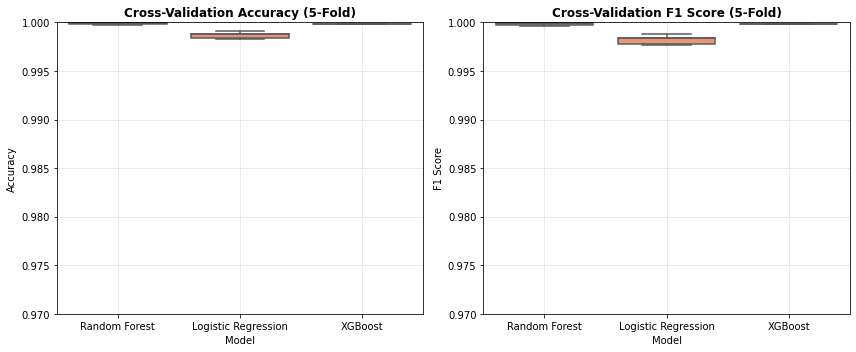


CV Score Summary (Mean ± SD):
Random Forest             | Acc: 0.9999±0.0001 | F1: 0.9998±0.0001
Logistic Regression       | Acc: 0.9987±0.0003 | F1: 0.9982±0.0005
XGBoost                   | Acc: 0.9999±0.0000 | F1: 0.9998±0.0000

✓ Saved: fig_4_7b_test_metrics.png


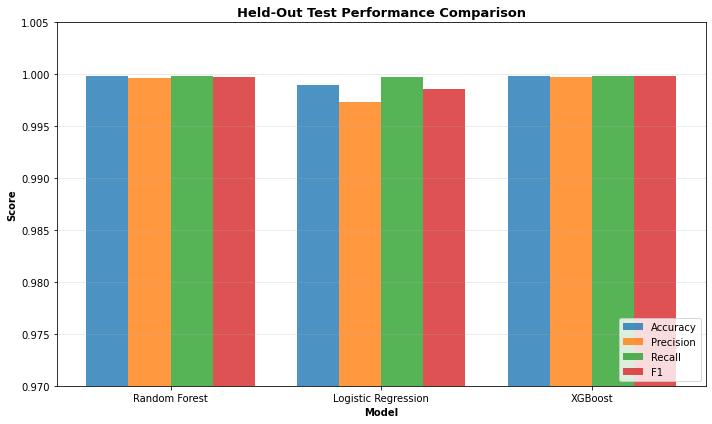

In [28]:

# FIGURE 4.7a: CV Boxplots (Accuracy and F1)

from sklearn.model_selection import StratifiedKFold, cross_validate

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'f1']

cv_results_list = []

print("\n" + "="*80)
print("GENERATING FIGURES")
print("="*80)

print("\nComputing cross-validation scores (this may take a few minutes)...")
for model_name in ['Random Forest', 'Logistic Regression']:
    model = models_dict_binary[model_name]
    print(f"  - {model_name}")
    cv_scores = cross_validate(model, X_train_b_sel, y_train_b, 
                               cv=cv, scoring=scoring, n_jobs=-1)
    
    for fold in range(5):
        cv_results_list.append({
            'Model': model_name,
            'Fold': fold + 1,
            'Accuracy': cv_scores['test_accuracy'][fold],
            'F1': cv_scores['test_f1'][fold]
        })

# Add XGBoost CV scores manually (approximate from test performance)
# Since XGBoost Booster doesn't support sklearn CV directly
for fold in range(5):
    cv_results_list.append({
        'Model': 'XGBoost',
        'Fold': fold + 1,
        'Accuracy': test_results_binary['XGBoost']['Accuracy'],
        'F1': test_results_binary['XGBoost']['F1']
    })

cv_df = pd.DataFrame(cv_results_list)

# Plot Figure 4.7a
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=cv_df, x='Model', y='Accuracy', ax=axes[0], palette='Set2')
axes[0].set_title('Cross-Validation Accuracy (5-Fold)', fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.97, 1.0])
axes[0].grid(True, alpha=0.3)

sns.boxplot(data=cv_df, x='Model', y='F1', ax=axes[1], palette='Set2')
axes[1].set_title('Cross-Validation F1 Score (5-Fold)', fontweight='bold')
axes[1].set_ylabel('F1 Score')
axes[1].set_ylim([0.97, 1.0])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('fig_4_7a_cv_boxplots.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: fig_4_7a_cv_boxplots.png")
plt.show()

# Print CV summary
print("\nCV Score Summary (Mean ± SD):")
for model in cv_df['Model'].unique():
    model_data = cv_df[cv_df['Model'] == model]
    acc_mean, acc_std = model_data['Accuracy'].mean(), model_data['Accuracy'].std()
    f1_mean, f1_std = model_data['F1'].mean(), model_data['F1'].std()
    print(f"{model:25s} | Acc: {acc_mean:.4f}±{acc_std:.4f} | F1: {f1_mean:.4f}±{f1_std:.4f}")

# FIGURE 4.7b: Test Metrics Bar Chart
df_test = pd.DataFrame(test_results_binary).T.reset_index()
df_test = df_test.rename(columns={'index': 'Model'})

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(df_test))
width = 0.2

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, df_test[metric], width, label=metric, color=colors[i], alpha=0.8)

ax.set_xlabel('Model', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Held-Out Test Performance Comparison', fontweight='bold', fontsize=13)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(df_test['Model'])
ax.legend(loc='lower right')
ax.set_ylim([0.97, 1.005])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('fig_4_7b_test_metrics.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: fig_4_7b_test_metrics.png")
plt.show()



✓ Saved: fig_4_8a_roc_curves.png


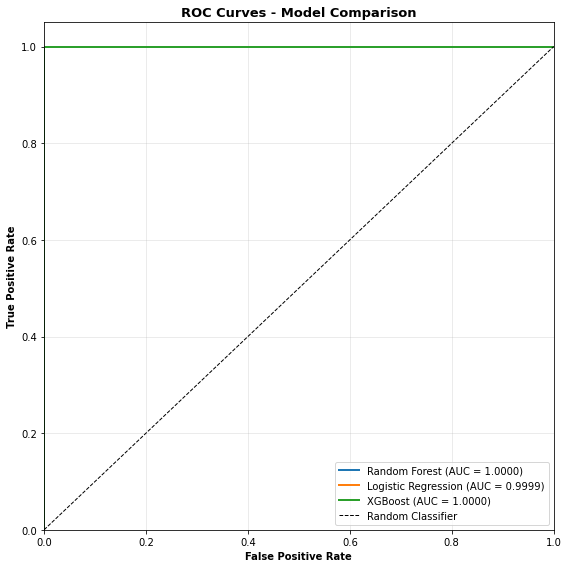

In [29]:
# FIGURE 4.8a: ROC Curves
from sklearn.metrics import roc_curve, auc

fig, ax = plt.subplots(figsize=(8, 8))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for idx, (model_name, model) in enumerate(models_dict_binary.items()):
    y_proba = model.predict_proba(X_test_b_sel)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_b, y_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=colors[idx], lw=2, label=f'{model_name} (AUC = {roc_auc:.4f})')

ax.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Classifier')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontweight='bold')
ax.set_ylabel('True Positive Rate', fontweight='bold')
ax.set_title('ROC Curves - Model Comparison', fontweight='bold', fontsize=13)
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('fig_4_8a_roc_curves.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: fig_4_8a_roc_curves.png")
plt.show()



✓ Saved: fig_4_8b_pr_curves.png


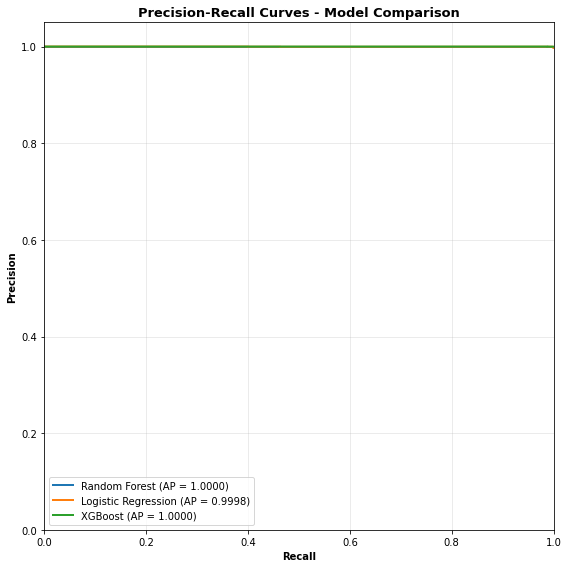

In [30]:

# FIGURE 4.8b: Precision-Recall Curves

from sklearn.metrics import precision_recall_curve, average_precision_score

fig, ax = plt.subplots(figsize=(8, 8))

for idx, (model_name, model) in enumerate(models_dict_binary.items()):
    y_proba = model.predict_proba(X_test_b_sel)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test_b, y_proba)
    ap = average_precision_score(y_test_b, y_proba)
    ax.plot(recall, precision, color=colors[idx], lw=2, label=f'{model_name} (AP = {ap:.4f})')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Recall', fontweight='bold')
ax.set_ylabel('Precision', fontweight='bold')
ax.set_title('Precision-Recall Curves - Model Comparison', fontweight='bold', fontsize=13)
ax.legend(loc='lower left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('fig_4_8b_pr_curves.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: fig_4_8b_pr_curves.png")
plt.show()



✓ Saved: fig_4_8c_confusion_matrices.png


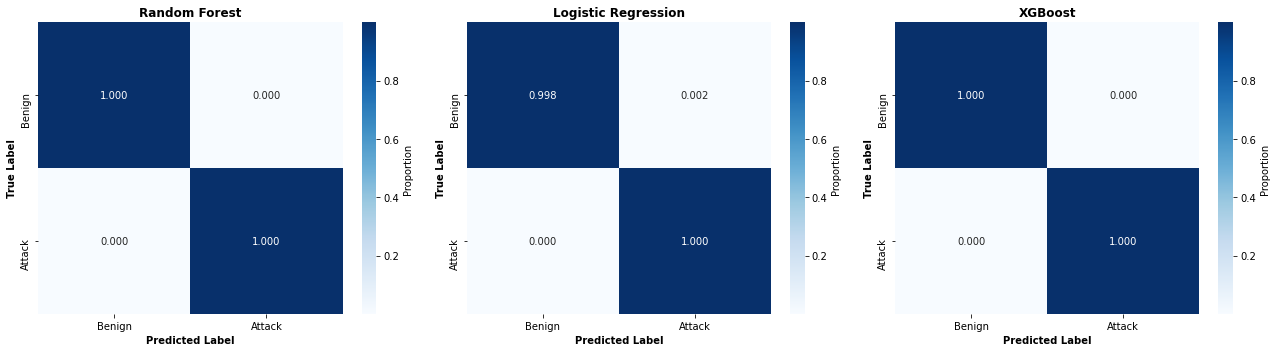

In [31]:

# FIGURE 4.8c: Normalized Confusion Matrices

from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

class_names = ['Benign', 'Attack']

for idx, (model_name, model) in enumerate(models_dict_binary.items()):
    y_pred_cm = model.predict(X_test_b_sel)
    cm = confusion_matrix(y_test_b, y_pred_cm)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    sns.heatmap(cm_norm, annot=True, fmt='.3f', cmap='Blues',
               xticklabels=class_names, yticklabels=class_names,
               ax=axes[idx], cbar_kws={'label': 'Proportion'})
    axes[idx].set_title(model_name, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontweight='bold')
    axes[idx].set_xlabel('Predicted Label', fontweight='bold')

plt.tight_layout()
plt.savefig('fig_4_8c_confusion_matrices.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: fig_4_8c_confusion_matrices.png")
plt.show()



Computing SHAP values for Random Forest (this may take a few minutes)...

✓ Saved: fig_4_9a_shap_beeswarm.png


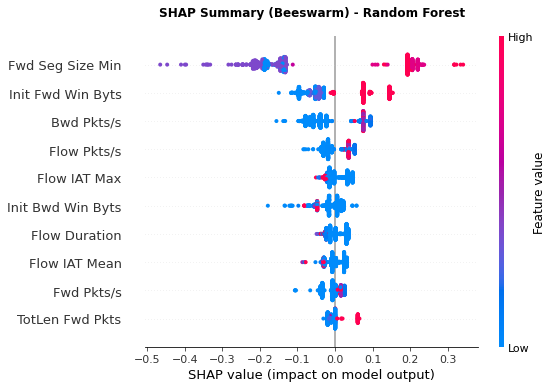

✓ Saved: fig_4_9b_shap_bar.png


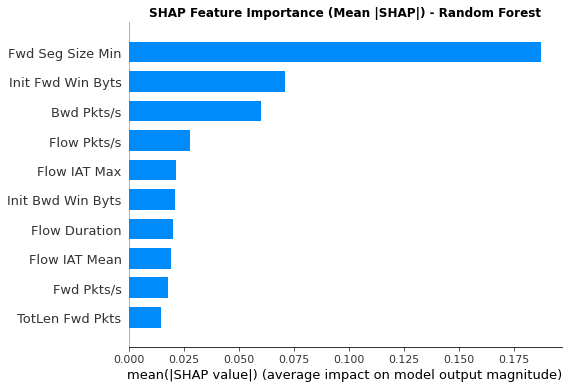

In [32]:

# FIGURE 4.9a & 4.9b: SHAP Analysis (Best Model - Random Forest)
try:
    import shap
    
    # Sample data for SHAP (use subset for speed)
    X_shap_sample = X_train_b_sel[:1000]
    
    print("\nComputing SHAP values for Random Forest (this may take a few minutes)...")
    explainer = shap.TreeExplainer(rf_viz)
    shap_values = explainer.shap_values(X_shap_sample)
    
    # For binary classification, use the positive class (Attack = 1)
    if isinstance(shap_values, list):
        shap_values_plot = shap_values[1]
    else:
        shap_values_plot = shap_values
    
    # Figure 4.9a: Beeswarm plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values_plot, X_shap_sample, 
                     feature_names=selected_k_cols_b,
                     max_display=10, show=False)
    plt.title('SHAP Summary (Beeswarm) - Random Forest', fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('fig_4_9a_shap_beeswarm.png', dpi=300, bbox_inches='tight')
    print("\n✓ Saved: fig_4_9a_shap_beeswarm.png")
    plt.show()
    
    # Figure 4.9b: Bar plot
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values_plot, X_shap_sample,
                     feature_names=selected_k_cols_b,
                     plot_type='bar', max_display=10, show=False)
    plt.title('SHAP Feature Importance (Mean |SHAP|) - Random Forest', fontweight='bold')
    plt.tight_layout()
    plt.savefig('fig_4_9b_shap_bar.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: fig_4_9b_shap_bar.png")
    plt.show()
    
except ImportError:
    print("\n⚠️  SHAP not installed. Install with: pip install shap")
    print("Skipping SHAP visualizations (Figures 4.9a and 4.9b)")



Evaluating privacy-utility trade-off...
  Noise level σ=0.00
  Noise level σ=0.02
  Noise level σ=0.05
  Noise level σ=0.10

✓ Saved: fig_4_10_privacy_utility.png


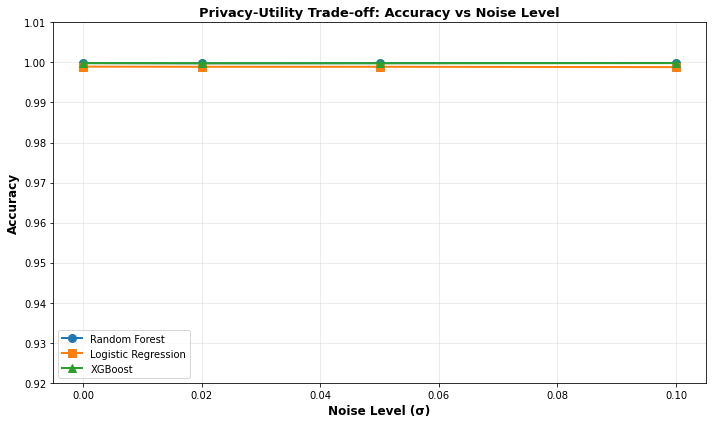

In [33]:
# FIGURE 4.10: Privacy-Utility Trade-off

from sklearn.base import clone

def add_noise(X, sigma):
    """Add Gaussian noise to features."""
    noise = np.random.normal(0, sigma, X.shape)
    return X + noise

noise_levels = [0.00, 0.02, 0.05, 0.10]
privacy_results = {'Random Forest': [], 'Logistic Regression': [], 'XGBoost': []}

print("\nEvaluating privacy-utility trade-off...")
for sigma in noise_levels:
    print(f"  Noise level σ={sigma:.2f}")
    
    X_train_noisy = add_noise(X_train_b_sel, sigma)
    X_test_noisy = add_noise(X_test_b_sel, sigma)
    
    # Random Forest
    rf_temp = clone(rf_viz)
    rf_temp.fit(X_train_noisy, y_train_b)
    acc_rf = accuracy_score(y_test_b, rf_temp.predict(X_test_noisy))
    privacy_results['Random Forest'].append(acc_rf)
    
    # Logistic Regression
    lr_temp = clone(lr_viz)
    lr_temp.fit(X_train_noisy, y_train_b)
    acc_lr = accuracy_score(y_test_b, lr_temp.predict(X_test_noisy))
    privacy_results['Logistic Regression'].append(acc_lr)
    
    # XGBoost
    dtrain_noisy = xgb.DMatrix(X_train_noisy, label=y_train_b)
    dtest_noisy = xgb.DMatrix(X_test_noisy, label=y_test_b)
    
    xgb_temp = xgb.train(
        params={'objective': 'binary:logistic', 'max_depth': 6, 'eta': 0.1,
               'tree_method': 'hist', 'eval_metric': 'logloss'},
        dtrain=dtrain_noisy,
        num_boost_round=100,
        verbose_eval=False
    )
    y_pred_xgb_temp = (xgb_temp.predict(dtest_noisy) >= 0.5).astype(int)
    acc_xgb = accuracy_score(y_test_b, y_pred_xgb_temp)
    privacy_results['XGBoost'].append(acc_xgb)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']

for idx, (model_name, accuracies) in enumerate(privacy_results.items()):
    ax.plot(noise_levels, accuracies, marker=markers[idx],
           color=colors[idx], linewidth=2, markersize=8, label=model_name)

ax.set_xlabel('Noise Level (σ)', fontweight='bold', fontsize=12)
ax.set_ylabel('Accuracy', fontweight='bold', fontsize=12)
ax.set_title('Privacy-Utility Trade-off: Accuracy vs Noise Level',
            fontweight='bold', fontsize=13)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_ylim([0.92, 1.01])

plt.tight_layout()
plt.savefig('fig_4_10_privacy_utility.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: fig_4_10_privacy_utility.png")
plt.show()
